## Final Code

### Setup

In [1]:
### Mount
from google.colab import drive
drive.mount('/content/drive')

### DL MMF, 6min

%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main'
!pip install -e .


Mounted at /content/drive
/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main
Obtaining file:///content/drive/Othercomputers/My%20MacBook%20Pro/CS6743_FinalProject/MMF/mmf-main
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.9/869.9 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━

### Import Modules

In [1]:
### Import General Modules, 3min
from mmf.common.registry import registry
from mmf.models.mmbt import MMBT
from mmf.utils.build import build_dataset
from mmf.utils.env import setup_imports
import matplotlib.pyplot as plt
from PIL import Image
import torch
import json

setup_imports()

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


### Load Dataset



In [ ]:
## Convert Data to MMF Format and Build Dataset, 6min

#Load Aneri's Augmented Data
!mmf_convert_hm \
--zip_file="/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/hateful_memes.zip" \
--bypass_checksum=1

dataset = build_dataset("hateful_memes")


## Path for Race Entity Dataset
# /content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/hm_data_phase2_race_.zip

## Path for Race Entity And Augmented Dataset
#/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/hm_aneri_kevin.zip

In [3]:
## Replace the moved JSONL files with your JSONL files

#aneri's jsonls are here
%cd '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memes'

#the rest of the jsonls are here
#%cd /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations

#Move your modified aneri files to the correct location
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/train_dev_transform_half.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memes/train_dev_transform_half.jsonl'
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/train_dev.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memes/train_dev.jsonl'
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/train_dev_transform_all_combined.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memes/train_dev_transform_all_combined.jsonl'
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/train_dev_transform_all.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memes/train_dev_transform_all.jsonl'
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/train.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/train.jsonl'
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/test_seen.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_seen.jsonl'
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/test_unseen.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl'
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/dev_seen.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/dev_seen.jsonl'
!cp '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json/dev_unseen.jsonl' '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/dev_unseen.jsonl'

!ls

/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memes
LICENSE.txt  train_dev.jsonl			     train_dev_transform_all.jsonl
README.md    train_dev_transform_all_combined.jsonl  train_dev_transform_half.jsonl


### Training

In [ ]:
## Running With Specified Default Config:
!mmf_run config="/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/visual_bert/configs/hateful_memes/defaults.yaml" \
model=visual_bert \
dataset=hateful_memes \
run_type=train_val \
optimizer.params.lr=5e-5 \
training.batch_size=64 \
training.log_interval=200 \
training.evaluation_interval=200 \
training.tensorboard=True \
training.checkpoint_interval=200 \
training.max_updates=1500 \
checkpoint.resume_pretrained=True \
checkpoint.resume_zoo=visual_bert.pretrained.coco \
dataset_config.hateful_memes.annotations.train[0]="hateful_memes/defaults/images/hateful_memes/train_dev_transform_all.jsonl" \
dataset_config.hateful_memes.annotations.val[0]="hateful_memes/defaults/annotations/dev_unseen.jsonl" \
dataset_config.hateful_memes.annotations.test[0]="hateful_memes/defaults/annotations/test_unseen.jsonl"

## Default Training Data
# "hateful_memes/defaults/annotations/train.jsonl"

## Training Data With Dev
# "hateful_memes/defaults/annotations/train_dev.jsonl"

## Training Data With Partial Images Transformations
# "hateful_memes/defaults/annotations/train_dev_transform_half.jsonl"

## Training Data With All Images Transformed
# "hateful_memes/defaults/annotations/train_dev_transform_all.jsonl"

## Training Data With All Augmented Data Combined
# "hateful_memes/defaults/annotations/train_dev_transform_all_combined.jsonl"

In [ ]:
## Test Set
!mmf_run config="/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/visual_bert/configs/hateful_memes/defaults.yaml" \
model=visual_bert \
dataset=hateful_memes \
run_type=test \
optimizer.params.lr=5e-5 \
training.batch_size=64 \
training.log_interval=200 \
training.evaluation_interval=200 \
training.tensorboard=True \
training.checkpoint_interval=200 \
training.max_updates=1500 \
checkpoint.resume_pretrained=True \
checkpoint.resume_zoo=visual_bert.pretrained.coco \
dataset_config.hateful_memes.annotations.train[0]="hateful_memes/defaults/annotations/train.jsonl" \
dataset_config.hateful_memes.annotations.val[0]="hateful_memes/defaults/annotations/dev_unseen.jsonl" \
dataset_config.hateful_memes.annotations.test[0]="hateful_memes/defaults/annotations/test_unseen.jsonl"

## Working Code

### Setup

In [ ]:
### Mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### Download MMF, 5min
# !pip install mmf

%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main'
!pip install -e .

## Files Changed:
## requirements.txt -> updated all modules to latest version
## mmf-cli/hm_convert -> removed password requirement, added "check_var" variable
## projects/vilbert/defaults.yaml -> changed max_updates to 1500
## builders/hatefulmemes/builder.py -> removed build assert, but not sure if does anything
## datasets/hateful_memes/defaults.yaml -> changed max_updates to 1500 but not sure if does anything

/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main
Obtaining file:///content/drive/Othercomputers/My%20MacBook%20Pro/CS6743_FinalProject/MMF/mmf-main
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mmf (pyproject.toml) ... done
  Created wheel for mmf: filename=mmf-1.0.0rc12-0.editable-cp310-cp310-linux_x86_64.whl size=10784 sha256=d0ae07cc9a1eb87e223ca5567666fbd927360b5bd4d8ae0248a5db22f6340c11
  Stored in directory: /tmp/pip-ephem-wheel-cache-swoq_83f/wheels/d9/6c/7a/3abf585cebea18d3153fcde22d4726e3698fedaf6954962021
Successfully built mmf
  Attempting uninstall: mmf
    Found existing installation: mmf 1.0.0rc12
    Uninstalling mmf-1.0.0rc12:
      Successfully uninstalled mmf-1.0.0rc12


### Import Modules

In [ ]:
### Import General Modules, 3min
from mmf.common.registry import registry
from mmf.models.mmbt import MMBT
from mmf.utils.build import build_dataset
from mmf.utils.env import setup_imports
import matplotlib.pyplot as plt
from PIL import Image
import torch
import json


### Import Modules for Fusion Model
# All model using MMF need to inherit BaseModel
from mmf.models.base_model import BaseModel
# Builder methods for image encoder and classifier
from mmf.utils.build import build_classifier_layer, build_image_encoder,build_text_encoder

setup_imports()
#/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img


/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


### Load Dataset

In [ ]:
## Convert Data to MMF Format and Build Dataset, 6min
#original
!mmf_convert_hm --zip_file="/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/hm_data_phase2_race.zip" --bypass_checksum=1
dataset = build_dataset("hateful_memes")


2024-04-25 04:40:18.238362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 04:40:18.238416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 04:40:18.239740: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 04:40:19.264729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-25 04:40:23.537657: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.10

/usr/local/lib/python3.10/dist-packages/omegaconf/grammar_visitor.py:253: UserWarning: In the sequence `MMF_LOG_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/omegaconf/grammar_visitor.py:253: UserWarning: In the sequence `MMF_REPORT_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/omegaconf/grammar_visitor.py:253: UserWarning: In the sequence `MMF_TENSORBOARD_LOGDIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/omegaconf/grammar_visitor.py:253: UserWarning: In the sequence `MMF_WANDB_LOGDIR,` some elements are missing: please replace them wit

[ Downloading: https://dl.fbaipublicfiles.com/mmf/data/datasets/hateful_memes/defaults/extras.tar.gz to /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/extras.tar.gz ]


[ Starting checksum for extras.tar.gz]
[ Checksum successful for extras.tar.gz]
Unpacking extras.tar.gz



/root/.cache/torch/mmf/glove.6B.zip: 862MB [02:47, 5.14MB/s]                           
100%|█████████▉| 399999/400000 [00:47<00:00, 8406.11it/s]


### JSON Files

#### Explore HM JSON Files

In [ ]:
### Explore HM JSON FILES

%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/hm_phase_2_json_files'
!ls

file_names = ['train.jsonl', 'dev_unseen.jsonl','dev_seen.jsonl','test_seen.jsonl', 'test_unseen.jsonl']

file_summary = {}
ids = {'dev_unseen.jsonl':[], 'dev_seen.jsonl':[], 'test_unseen.jsonl':[], 'test_seen.jsonl':[], 'train.jsonl':[]}

for name in file_names:

  with open(name, 'r') as json_file:
    json_list = list(json_file)

  hate_count = {0:0,1:0,2:0}
  for json_str in json_list:
    image_json = json.loads(json_str)
    hate_count[image_json['label']] +=1
    ids[name].append(image_json['id'])

  hate_count[2] = hate_count[0] + hate_count[1]
  file_summary[name] = hate_count

file_summary

# {'train.jsonl': {0: 5481, 1: 3019, 2: 8500},
#  'dev_unseen.jsonl': {0: 340, 1: 200, 2: 540},
#  'dev_seen.jsonl': {0: 253, 1: 247, 2: 500},
#  'test_seen.jsonl': {0: 510, 1: 490, 2: 1000},
#  'test_unseen.jsonl': {0: 1250, 1: 750, 2: 2000}}




/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/json_files
dev_seen.jsonl	dev_unseen.jsonl  test_seen.jsonl  test_unseen.jsonl  train.jsonl


{'train.jsonl': {0: 5481, 1: 3019, 2: 8500},
 'dev_unseen.jsonl': {0: 340, 1: 200, 2: 540},
 'dev_seen.jsonl': {0: 253, 1: 247, 2: 500},
 'test_seen.jsonl': {0: 510, 1: 490, 2: 1000},
 'test_unseen.jsonl': {0: 1250, 1: 750, 2: 2000}}

In [ ]:
## Find Absolutely Unseen HM Images for model
dev_seen = set(ids['dev_seen.jsonl'])
dev_unseen = set(ids['dev_unseen.jsonl'])
test_seen = set(ids['test_seen.jsonl'])
test_unseen = set(ids['test_unseen.jsonl'])
train = set(ids['train.jsonl'])

len(dev_unseen - dev_seen)


140

In [ ]:
int('444')

444

#### Create New JSON Files for Memotion

In [ ]:
### Create New JSON files for Memotion
import os , random, math
%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/data_hold/memotion_picked/img'


# Rename Image Files so that it's just XXXX.extension
directory = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/data_hold/memotion_picked/img'
files = os.listdir(directory)

num_files = 0
for file in files:
    idx = file.find('_')
    if  idx==-1:
      pass
    else:
      new_name = file[idx+1:]
      os.rename(file,new_name)

    num_files +=1

print('Num images', num_files)

# Shuffle and Batch Image Indices
memotion_ids = []
for file in files:
  idx = file.find('.')
  id = int(file[:idx].strip(' ._'))
  memotion_ids.append(id)

print('Num Extracted Ids', len(memotion_ids))
print(memotion_ids[:10])



file_names = ['train.jsonl',
              'dev_unseen.jsonl',
              'dev_seen.jsonl',
              'test_unseen.jsonl',
              'test_seen.jsonl'
              ]

random.shuffle(memotion_ids)

n = len(memotion_ids)
seen_end = math.floor(0.8*n)
dev_unseen_end = math.floor(0.05*n) + seen_end

train_ids = memotion_ids[:seen_end]
dev_unseen_ids = memotion_ids[seen_end:dev_unseen_end]
test_unseen_ids = memotion_ids[dev_unseen_end:]

print(len(train_ids+dev_unseen_ids+test_unseen_ids) == n)

dev_seen_ids = train_ids[:math.floor(len(train_ids)*0.05)]
test_seen_ids = train_ids[len(train_ids) - math.floor(len(train_ids)*0.1):]

print('\n', 'train', len(train_ids), '\n',
      'dev_unseen', len(dev_unseen_ids),'\n',
      'test_unseen', len(test_unseen_ids),'\n \n',
      'dev_seen', len(dev_seen_ids),'\n',
      'test_seen', len(test_seen_ids))


# Create JSON-List files for consumption
#format
# {
# "id": "08291",
# "img": "img/08291.png",
# "label": 1,
# "text": "white people is this a shooting range"
# }


/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/data_hold/memotion_picked/img
Num images 50


ValueError: invalid literal for int() with base 10: 'image_4605'

#### Modify HM JSONL Files To Include Race tag

In [ ]:
## RUN THIS LAST. RUN BOTH CELLS BELOW FIRST
from typing import Dict
### Loop Through all JSONL files
import os, json

#set directories
%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/hm_phase_2_json_files'
dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/hm_phase_2_json_files'
race_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu/flat_race_scores.json'

#Open training files
training_files = os.listdir(dir)
#Open race_file dict
with open(race_dir, 'r') as race_json:
      race_dict = json.load(race_json) #this is one dict with a lot of keys

#Create new training jsonl files
for file in training_files:
    print(f'working on {file}')
    a=[] #for holding each image sample temporarily

    #Loop through jsonl file and modify each sample in the file
    with open(file, 'r') as json_file:
      json_list = list(json_file) #this is a list of string
      for sample_str in json_list:
        sample = json.loads(sample_str)#this is a dict
        sample_id = sample['id'] #this is a string with leading zeros "08970"

        race_pred = race_dict[sample_id][0] if sample_id in race_dict.keys() else 'None'
        entity_pred = race_dict[sample_id][1] if sample_id in race_dict.keys() else 'None'

        sample['race'] = race_pred
        sample['entity'] = entity_pred
        a.append(sample) #add modified sample to temp list

    #Write New JSONL files
    old_name = file
    new_name = old_name[:old_name.find('.')]
    with open(new_name+'.jsonl', 'w') as outfile:
        for entry in a:
            json.dump(entry, outfile)
            outfile.write('\n')


## Structure of flat_race_scores.json from kevin
# {'08175': [[(0.958, 'White', 'Male'), ('None', 'None', 'None')], ['World War II', 'Germany','Nazi Party']]}
# Dict( List( List( tuple, tuple ), List( ) ) )


## Structure of the annotations json from zhu
# --race_list is a list of dicts.
#   --each item in list is a dict with dict_keys(['img_name', 'boxes_and_score'])
# --boxes and score is a list of dicts
#   --each item in list is a dict with dict_keys(['ymin', 'xmin', 'ymax', 'xmax', 'score', 'class_name', 'class_id', 'race', 'gender'])
# class_name e.g = human_face, class_id = 502


/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/hm_phase_2_json_files
working ontest_seen.jsonl
working ontest_unseen.jsonl
working ontrain.jsonl
working ondev_unseen.jsonl
working ondev_seen.jsonl


In [ ]:
### For Each JSONL File, Flatten Zhu's Entity JSONL into a single dict to store in your flattened_race file

import os, json

#set directories
%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu'
dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu'

#Open jsonl files
entity_jsonl_files = os.listdir(dir)
ind = 0

flat_entity_file = {}

for jsonl_file in entity_jsonl_files:
    name = jsonl_file[:jsonl_file.find('.')]
    if name not in ['dev_seen','dev_unseen','test_seen','test_unseen','train']:
      continue

    print(f'working on {jsonl_file}')

    #Loop through jsonl file and modify each sample in the file
    with open(jsonl_file, 'r') as json_file:
      json_list = list(json_file) #this is a list of string
      for sample_str in json_list:
        sample = json.loads(sample_str)#this is a dict

        id = str(sample["img"][4:sample["img"].find('.')])

        arr = sample["partition_description"][0]
        entity =  arr if len(arr) != 0 else ['None']
        flat_entity_file[id] = entity

with open('flat_entity_scores.json', 'w') as file:
  json.dump(flat_entity_file, file)

#{"id": 8291, "img": "img/08291.png", "label": 1, "text": "white people is this a shooting range", "image_partition": [[0, 0, 825, 549, 1.0]], "partition_description": [["Peanut allergy", "Family", "Parent", "Health", "Gender identity", "Food allergy", "Developmental disability", "Language delay", "School", "transgender children"]], "text_char_partition_id": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu
working on test_seen.entity.jsonl
working on train.entity.jsonl
working on dev_unseen.entity.jsonl
working on test_unseen.entity.jsonl
working on dev_seen.entity.jsonl


In [ ]:
### Flatten Zhu's race scores for the operation in the cell above, 1min
import json

entity_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu/flat_entity_scores.json'
race_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu/box_annos.race.json'
write_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu/flat_race_scores.json'

with open(race_dir, 'r') as race_json:
      race_list = json.load(race_json)

with open(entity_dir, 'r') as entity_json:
      entity_list = json.load(entity_json)

flattened_zhu = {}
for sample in race_list:
  id = sample['img_name'] #string "08970.png"
  id_trim = id[:id.find('.')]

  scores = sample['boxes_and_score'] #list

  sample_score_list = []

  for face in scores:
    if face['race'] == None:
      sample_score_list.append(('None','None','None'))
    else:
      face_score = face['score']
      face_race = face['race']
      face_gender = face['gender']
      sample_score_list.append((face_score,face_race,face_gender))

  if len(sample_score_list) ==0:
    sample_score_list.append(('None','None','None'))
  flattened_zhu[id_trim] = sample_score_list #Dict[img_id:[(score,race,gender),(score,race,gender)]]

#For now just take top three predictions
flattened_zhu_down = {}
c = 0
for img_id, scores in flattened_zhu.items():
    entity = entity_list[img_id]
    races = list(set(scores[:4]))
    races.sort(key = lambda arr: str(arr[0]))
    flattened_zhu_down[img_id] = [races,entity] #remove any repeated ('None') triplets

with open(write_dir, 'w') as file:
  json.dump(flattened_zhu_down, file)


In [ ]:
import os, json

aneri_json_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json'
flat_race_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu/flat_race_scores.json'

## Structure of flat_race_scores.json from kevin
# {'08175': [[(0.958, 'White', 'Male'), ('None', 'None', 'None')], ['World War II', 'Germany','Nazi Party']]}
# Dict( List( List( tuple, tuple ), List( ) ) )

with open(flat_race_dir, 'r') as json_file:
  flat_race_scores = json.load(json_file)

flat_race_scores

#### Modify Aneri's New JSONL Files to Have Race and Entity Fields

In [ ]:
import os, json

#Augmented Data Files
%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json'
aneri_json_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json'
flat_race_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu/flat_race_scores.json'

## Structure of flat_race_scores.json from kevin
# {'08175': [[(0.958, 'White', 'Male'), ('None', 'None', 'None')], ['World War II', 'Germany','Nazi Party']]}
# Dict( List( List( tuple, tuple ), List( ) ) )

with open(flat_race_dir, 'r') as json_file:
  flat_race_scores = json.load(json_file)

flat_race_scores_ids = flat_race_scores.keys()

#Open jsonl files
aneri_files = os.listdir(aneri_json_dir)

for file_name in aneri_files:
  if file_name in ['train_dev_transform_all.jsonl','train_dev_transform_all_combined.jsonl','train_dev_transform_half.jsonl']:

    with open(file_name, 'r') as json_file:
      aneri_og_list = list(json_file) #this is a list of string

    a = []
    for sample_str in aneri_og_list:
      sample = json.loads(sample_str)#this is a dict
      id = sample['id']
      if id in flat_race_scores_ids:
        sample['race'] = flat_race_scores[id][0]
        sample['entity'] = flat_race_scores[id][1]
      else:
        sample['race'] = ('None','None','None')
        sample['entity'] = ['None']
      a.append(sample)

    #Write New JSONL files
    with open(file_name, 'w') as outfile:
        for entry in a:
            json.dump(entry, outfile)
            outfile.write('\n')


/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json


In [ ]:
#Train_Dev File

import os, json

%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json'
aneri_json_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json'
flat_race_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu/flat_race_scores.json'

## Structure of flat_race_scores.json from kevin
# {'08175': [[(0.958, 'White', 'Male'), ('None', 'None', 'None')], ['World War II', 'Germany','Nazi Party']]}
# Dict( List( List( tuple, tuple ), List( ) ) )

with open(flat_race_dir, 'r') as json_file:
  flat_race_scores = json.load(json_file)

flat_race_scores_ids = flat_race_scores.keys()

#Open jsonl files
aneri_files = os.listdir(aneri_json_dir)

for file_name in aneri_files:
  if file_name in ['train_dev.jsonl']:

    with open(file_name, 'r') as json_file:
      aneri_og_list = list(json_file) #this is a list of string

    a = []
    for sample_str in aneri_og_list:
      sample = json.loads(sample_str)#this is a dict
      id = sample['id']
      if id in flat_race_scores_ids:
        sample['race'] = flat_race_scores[id][0]
        sample['entity'] = flat_race_scores[id][1]
      else:
        sample['race'] = ('None','None','None')
        sample['entity'] = ['None']
      a.append(sample)

    #Write New JSONL files
    with open(file_name, 'w') as outfile:
        for entry in a:
            json.dump(entry, outfile)
            outfile.write('\n')

/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/aneri_json


### Default Traning Process

In [ ]:
### Training, 15min for Vilbert 1500 iters, 19min for visualbert 1500 iters
# import os
# os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# !mmf_run config='/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/visual_bert/configs/hateful_memes/defaults.yaml' \
#  model='visual_bert' \
#  dataset='hateful_memes'

## For GPU allocation issues
#PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

## To resume the training in case it gets intterupted, run:
!mmf_run config="/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/visual_bert/configs/hateful_memes/defaults.yaml" \
model=visual_bert \
dataset=hateful_memes \
run_type=train_val \
optimizer.params.lr=5e-5 \
training.log_interval=200 \
training.batch_size=64 \
training.evaluation_interval=200 \
training.tensorboard=True \
training.checkpoint_interval=200 \
checkpoint.resume_pretrained=True \
checkpoint.resume_zoo=visual_bert.pretrained.coco \
dataset_config.hateful_memes.annotations.train[0]="hateful_memes/defaults/annotations/train.jsonl" \
dataset_config.hateful_memes.annotations.val[0]="hateful_memes/defaults/annotations/dev_unseen.jsonl" \
dataset_config.hateful_memes.annotations.test[0]="hateful_memes/defaults/annotations/test_unseen.jsonl"

In [ ]:
### Evaluation on Validation set

!mmf_run config='/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/visual_bert/configs/hateful_memes/defaults.yaml' \
model='visual_bert' \
dataset='hateful_memes' \
run_type=val \
checkpoint.resume_file='/content/save/visual_bert_final.pth' \
checkpoint.resume_pretrained=False

## Vilbert 1500 iters Results
# val/hateful_memes/cross_entropy: 0.7547
# val/total_loss: 0.7547
# val/hateful_memes/accuracy: 0.6333 #65%
# val/hateful_memes/binary_f1: 0.3400
# val/hateful_memes/roc_auc: 0.6080 #65%


## Visual lbert 1500 iters Results
# cross_entropy: 1.1882
# val/total_loss: 1.1882
# val/hateful_memes/accuracy: 0.6815
# val/hateful_memes/binary_f1: 0.4911
# val/hateful_memes/roc_auc: 0.6770

## VisualBert Race 1500 iters
# cross_entropy: 1.0722,
# val/total_loss: 1.0722,
# val/hateful_memes/accuracy: 0.6685,
# val/hateful_memes/binary_f1: 0.3891,
# val/hateful_memes/roc_auc: 0.6671

## VisualBert Race Gender Entity 1500 iters
# cross_entropy: 0.8968,
# val/total_loss: 0.8968,
# val/hateful_memes/accuracy: 0.6574,
# val/hateful_memes/binary_f1: 0.4932,
# val/hateful_memes/roc_auc: 0.7021

## VisualBert Race Gender Entity 1000 iters
# cross_entropy: 1.0733,
# val/total_loss: 1.0733,
# val/hateful_memes/accuracy: 0.6500,
# val/hateful_memes/binary_f1: 0.5181,
# val/hateful_memes/roc_auc: 0.6551

## VisualBert Race Gender Entity 800 iters
# cross_entropy: 0.9385,
# val/total_loss: 0.9385,
# val/hateful_memes/accuracy: 0.6741,
# val/hateful_memes/binary_f1: 0.3383,
# val/hateful_memes/roc_auc: 0.7150

## VisualBert Race Gender Entity 1200 iters
# cross_entropy: 1.1846,
# val/total_loss: 1.1846,
# val/hateful_memes/accuracy: 0.6667,
# val/hateful_memes/binary_f1: 0.4643,
# val/hateful_memes/roc_auc: 0.6638

## VisualBert Entity 1000 iters
# ross_entropy: 0.8504
# val/total_loss: 0.8504
# val/hateful_memes/accuracy: 0.6593
# val/hateful_memes/binary_f1: 0.4177
# val/hateful_memes/roc_auc: 0.6830

## VisualBert 1000 iters
# cross_entropy: 0.9204,
# val/total_loss: 0.9204,
# val/hateful_memes/accuracy: 0.6833,
# val/hateful_memes/binary_f1: 0.4771,
# val/hateful_memes/roc_auc: 0.7150,

#batch 32
# cross_entropy: 0.8723,
# val/total_loss: 0.8723,
# val/hateful_memes/accuracy: 0.6611,
# val/hateful_memes/binary_f1: 0.3297,
# val/hateful_memes/roc_auc: 0.6786

#batch 32
# lr1e-5
# cross_entropy: 0.7706,
# val/total_loss: 0.7706,
#  val/hateful_memes/accuracy: 0.6333,
#  val/hateful_memes/binary_f1: 0.2143,
#  val/hateful_memes/roc_auc: 0.6481,
#####################################

# VB 2500 iters
# cross_entropy: 1.1849
# val/total_loss: 1.1849
# val/hateful_memes/accuracy: 0.6815
# val/hateful_memes/binary_f1: 0.5057
# val/hateful_memes/roc_auc: 0.6907

# VB Race 2500 iters




In [ ]:
### Evaluation on Test set

!mmf_run config='/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/visual_bert/configs/hateful_memes/defaults.yaml' \
model='visual_bert' \
dataset='hateful_memes' \
run_type=test \
checkpoint.resume_file='/content/save/visual_bert_final.pth' \
checkpoint.resume_pretrained=False

## Vilbert 1500 iters Results
# test/hateful_memes/cross_entropy: 0.7241
# test/total_loss: 0.7241
# test/hateful_memes/accuracy: 0.6485 #75%
# test/hateful_memes/binary_f1: 0.3436
# test/hateful_memes/roc_auc: 0.6598 #75%

## Visual Bert 1500 iters
# cross_entropy: 1.1515
# test/total_loss: 1.1515
# test/hateful_memes/accuracy: 0.6900
# test/hateful_memes/binary_f1: 0.4910
# test/hateful_memes/roc_auc: 0.7270

## VB Race 1500 iters
# cross_entropy: 1.0120,
# test/total_loss: 1.0120,
# test/hateful_memes/accuracy: 0.6905,
# test/hateful_memes/binary_f1: 0.4488,
# test/hateful_memes/roc_auc: 0.7156


## VisualBert Race Gender Entity 1500 iters
# cross_entropy: 0.8980,
# test/total_loss: 0.8980,
# test/hateful_memes/accuracy: 0.6865,
# test/hateful_memes/binary_f1: 0.5317,
# test/hateful_memes/roc_auc: 0.7184

## VisualBert Race Gender Entity 1000 iters

# cross_entropy: 0.9457,
# test/total_loss: 0.9457,
# test/hateful_memes/accuracy: 0.6920,
# test/hateful_memes/binary_f1: 0.5910,
# test/hateful_memes/roc_auc: 0.7209


## VisualBert Race Gender Entity 800 iters
# cross_entropy: 0.9022,
# test/total_loss: 0.9022,
# test/hateful_memes/accuracy: 0.6820,
# test/hateful_memes/binary_f1: 0.3837,
# test/hateful_memes/roc_auc: 0.7258

## VisualBert Race Gender Entity 800 iters
# cross_entropy: 1.0468,
# test/total_loss: 1.0468,
# test/hateful_memes/accuracy: 0.7005,
# test/hateful_memes/binary_f1: 0.5196,
# test/hateful_memes/roc_auc: 0.7277

## VisualBert Entity 1000 iters
# cross_entropy: 0.8035,
# test/total_loss: 0.8035,
# test/hateful_memes/accuracy: 0.6980,
# test/hateful_memes/binary_f1: 0.5113,
# test/hateful_memes/roc_auc: 0.7159

# VisualBert 1000 iters
# cross_entropy: 0.8601,
# test/total_loss: 0.8601,
# test/hateful_memes/accuracy: 0.7155,
# test/hateful_memes/binary_f1: 0.5633,
# test/hateful_memes/roc_auc: 0.7539


#race batch 32
# cross_entropy: 0.8438,
# test/total_loss: 0.8438,
# test/hateful_memes/accuracy: 0.6805,
# test/hateful_memes/binary_f1: 0.3920,
# test/hateful_memes/roc_auc: 0.7064

# batch32
# lr1e-5
# cross_entropy: 0.7550,
# test/total_loss: 0.7550,
# test/hateful_memes/accuracy: 0.6520,
# test/hateful_memes/binary_f1: 0.2352,
# test/hateful_memes/roc_auc: 0.6752



#####################################

## VB 2500 iters
# cross_entropy: 1.0721
# test/total_loss: 1.0721
# test/hateful_memes/accuracy: 0.7110
# test/hateful_memes/binary_f1: 0.5519
# test/hateful_memes/roc_auc: 0.7363

## VB Race 2500 iters




In [ ]:
### Inference on Test Set
#Should output to CSV, but don't know where yet
!mmf_predict config='/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/vilbert/configs/hateful_memes/direct.yaml' \
model='vilbert' \
dataset='hateful_memes' \
run_type=test checkpoint.resume_file='/content/save/vilbert_final.pth' \
checkpoint.resume_pretrained=False

### Extending

#### Tutorial - Registry Way

In [ ]:
### #Registry Way - Concat Bert Tutorial

# File Locations
# /content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main
# Class file: /mmf/models/concat_bert_tutorial.py
# General Config file: /mmf/configs/models/concat_bert_tutorial/defaults.yaml
# Experiment Config file: /projects/concat_bert_tutorial/defaults.yaml

# !mmf_run config="/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/concat_bert_tutorial/defaults.yaml" \
#     model=concat_bert_tutorial \
#     dataset=hateful_memes \
#     run_type=train_val

#### Project Extension - Registry Way

In [ ]:
### Registry Way Project Extension

# Remaining Steps for project:
# 1. Add memes to dataset
# 2. .json file with the annotations for the above memes
# 3. Get embeddings for fairface race predictions and bbox associations
# 4. Intercept the visual bert dataset build and concat your fairface embeddings
#    a. Create a new dataset that concats hatefulmemes and memotion memes
#    b. Modify mmf/models/visual_bert.py -> BertVisioLinguisticEmbeddings to add fairface embeddings

# Old File Locations
# /content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main
# Class file: /mmf/models/project_extension.py
# General Config file: /mmf/configs/models/project_extension/defaults.yaml
# Experiment Config file: /projects/project_extension/defaults.yaml



!mmf_run config="/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/mmf-main/projects/project_extension/defaults.yaml" \
    model=project_extension \
    dataset=hateful_memes \
    run_type=train_val

### Fairface

In [ ]:
!pip install dlib

%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master'
# !python3 predict.py --csv "test_imgs.csv" ## No Bounding box data

# #Run Fairface for Memotion images
!python3 predict_bbox.py --input_csv "project_mem_input_imgs.csv" \
--output_csv "project_mem_outputs.csv" \
--detected_faces_folder "project_mem_detected_faces"


# #Run Fairface for HM images (would take 5+ hours to do yourself. Just used prior annotations from Zhu)
# !python3 predict_bbox.py --input_csv "project_hm_input_imgs.csv" \
# --output_csv "project_hm_outputs.csv" \
# --detected_faces_folder "project_hm_detected_faces"



In [ ]:
# #Create input csv with file paths of each image
# # img_path
# # project_mem_input_imgs/mem1.jpg

# import os
# d_mem = {'img_path':[]}

# # Go to Memotion Folder to get names
# memotion_directory = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/data_hold/memotion_picked/img'
# memotion_file_names = os.listdir(memotion_directory)

# #Sort bc the images are listed in order
# memotion_file_names.sort(key = lambda name: int(name[:name.find('.')]))
# for name in memotion_file_names:
#   d_mem['img_path'].append('project_mem_input_imgs/'+name)


# d_hm = {'img_path':[]}
# # Go to Memotion Folder to get names
# hm_directory = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/MMF/data_hold/hateful_memes/img'
# hm_file_names = os.listdir(hm_directory)

# for name in hm_file_names:
#   d_hm['img_path'].append('project_hm_input_imgs/'+name)


# import csv
# %cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master'
# with open('project_mem_input_imgs.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
#     w = csv.DictWriter(f, d_mem.keys())
#     w.writeheader()
#     w.writerow(d_mem)

# with open('project_hm_input_imgs.csv', 'w') as f:  # You will need 'wb' mode in Python 2.x
#     w = csv.DictWriter(f, d_hm.keys())
#     w.writeheader()
#     w.writerow(d_hm)



/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master


In [ ]:
### Load and Explore Zhu's an explore race annotations

import json
%cd '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu'

race_dir = '/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu/box_annos.race.json'
with open(race_dir, 'r') as json_data:
    race_list = json.load(json_data)

#NOTE: the number of boxes in each list indicates how many people the software found
# 17 items in the boxes list means 17 people found. Race and gender could be None

n = 0
m = 2
print(len(race_list))
print(race_list[n]['img_name'])
print(race_list[n].keys())
print(len(race_list[n]['boxes_and_score']))
print(race_list[n]['boxes_and_score'][m].keys())
print(race_list[n]['boxes_and_score'][m]['race'])
print(race_list[n]['boxes_and_score'][m]['gender'])
print(type(race_list[n]['boxes_and_score'][m]['gender'])

## Structure of the annotations json
# --race_list is a list of dicts.
#   --each item in list is a dict with dict_keys(['img_name', 'boxes_and_score'])
# --boxes and score is a list of dicts
#   --each item in list is a dict with dict_keys(['ymin', 'xmin', 'ymax', 'xmax', 'score', 'class_name', 'class_id', 'race', 'gender'])

/content/drive/Othercomputers/My MacBook Pro/CS6743_FinalProject/FairFace-master/annotations/hateful_memes_zhu
12140
01235.png
dict_keys(['img_name', 'boxes_and_score'])
5
dict_keys(['ymin', 'xmin', 'ymax', 'xmax', 'score', 'class_name', 'class_id', 'race', 'gender'])
None
None
<class 'NoneType'>


### Notes

In [ ]:
### Code Notes

#########################################################################################################
### Summary
#                               -> Load Dataset -> Build Dataset -> build.py                                 |----------------VISUALBERT CLASS----------------|
# run -> trainer -> Load Trainer                                                                             |             Format Data and Train              |
#                               -> Load Model   -> Build Model -> Run_training_batch  -> model.forward() ->  |------------------------------------------------|
#
# mmf/models/visual_bert.py -> BertVisioLinguisticEmbeddings

#########################################################################################################
#### Code Flow Detailed Notes ####

## Call run() giving config, model type, and dataset name
## In cli/run.py:
##           The config is built with build_config(config).
##           The trainer is built with utils/build.py/build_trainer(config)
##           trainer.load() is called
##           trainer.train() is called
  ## In /utils/build.py/build_trainer():
  ##                  trainer_obj is created from registry.get_trainer_class(config.training.trainer)
  ##                  for some reason the visual_bert default config file you have doesn't have a trainer specified so assume it sets mmf_trainer

  ## In /trainers/mmf_trainer.py/load():
  ##                  load() calls base_trainer.py/load() which calls:
  ##                  (in mmf_trainer) self.load_datasets()
  ##                  (in mmf_trainer) self.load_model()
  ##                  (in mmf_trainer) self.load_optimizer()

      ## In /trainers/mmf_trainer.py/load_datasets():
      ##      self.dataset_loader = MultiDataModule(self.config)
      ##      self.train_loader = self.dataset_loader.train_dataloader()

          ## In /datasets/multi_datamodule.py:
          ##     Config is set and train_dataloader() is called which calls
          ##     self.train_loader = self._build_multi_dataloader("train")

              ## In /datasets/multi_datamodule.py/_build_multi_dataloader:
              ##.    iteration_strategy = self._build_iteration_strategy(self.config, loader_args)
              ##.    loader = MultiDataLoader(loader_args, iteration_strategy) is called

              ## In /datasets/multi_dataset_loader.py/class MultiDatasetLoader(MultiDataLoader)
              ##      load() is called which calls
              ##.     self.build_datasets(config)
              ##      self.build_dataloaders()
              ##.     self.set_lengths()
                  ## In /datasets/multi_dataset_loader.py/build_datasets
                  ##    dataset_instance = /utils/build.py/build_dataset(dataset, dataset_config, self.dataset_type)
                      ## In /utils/build.py/build_dataset()
                      ##    datamodule_instance = build_datamodule(dataset_key)
                          ##    the instance is an pl.LightningDataModule instance
                      ## datamodule_instance.build_dataset(config)
                            ##    build_dataset() is a method in /datasets/base_dataset_builder.py
                            ##    build_dataset() calls self.build(config, dataset_type, *args, **kwargs) which is a lightningdatamodule method
                      ##    dataset = datamodule_instance.load_dataset(config, dataset_type)


  ## In /datasets/builders/hateful_memes/builder.py: class HatefulMemesBuilder(MMFDatasetBuilder):
  ##    creates dataset by calling super().load()
      ## In /datasets/mmf_dataset_builder.py
      ##    annotations = self._read_annotations(config, dataset_type)
      ##    for imdb_idx in range(len(annotations)):
      ##      dataset_class = self.dataset_class
      ##      dataset = dataset_class(config, dataset_type, imdb_idx)
      ##      datasets.append(dataset)
      ##    dataset = MMFConcatDataset(datasets)

      ## where dataset_class=HatefulMemesImageDataset and
      ## from mmf.datasets.builders.hateful_memes.dataset import (
          ## HatefulMemesFeaturesDataset,
          ## HatefulMemesImageDataset,
      ## In /datasets/builders/hateful_memes/dataset.py:
      ##    This is where the files are read in. Modify this


## In /builders/dataset.py -> HatefulMemesFeaturesDataset(MMFDataset) -> MMFDataset instance __init__
  ##  BaseDataset __init__
  ##  self.annotation_database = annotation_database
  ##  self.annotation_db = self.build_annotation_db() -> self.annotation_database(self.config, annotation_path, self.dataset_type)
  ##  self.features_db = self.build_features_db() -> FeaturesDatabase(self.config, features_path, annotation_db=self.annotation_db)
      ## In /datasets/databases/annotation_database.py:
          ## path = get_absolute_path(path)
          ## self.load_annotation_db(path) -> self._load_jsonl(path)
                  # def _load_jsonl(self, path):
                  #   with PathManager.open(path, "r") as f:
                  #       db = f.readlines()
                  #       for idx, line in enumerate(db):
                  #           db[idx] = json.loads(line.strip("\n"))
                  #       self.data = db
                  #       self.start_idx = 0




  ## Some process that you don't have time to figure out, calls self.dataset(idx)
  ## and that calls self.annotation_db[idx] (which is the json file)
  ## and grabs the 'text' field of the json and sends it to the text_processor
  ## and returns the text data
  ##(line 137 in mmf_dataset_builder.py for loops through all annotations and calls _getitem_
  ## on the HatefulMemesFeaturesDataset with idx in dataset.py)




  ## In modules/embeddings.py -> BERTVISIOLANGUAGE
        # input_ids = [batch_size, sequence_length]
        # token_type_ids = [batch_size, sequence_length]
        # visual_embedding = [batch_size, image_feature_length, image_feature_dim]
        # image_text_alignment = [batch_size, image_feature_length, alignment_dim]

    ## Token_type_ids are set in the call to BERTVISIOLANGUAGE, but for the code it only calls below.
    ## Don't need to set token_type_ids bc each embedding is only one type
    # self.bert = VisualBERTBase(
    #             self.bert_config,
    #             visual_embedding_dim=self.config.visual_embedding_dim,
    #             embedding_strategy=self.config.embedding_strategy,
    #             bypass_transformer=self.config.bypass_transformer,
    #             output_attentions=self.config.output_attentions,
    #             output_hidden_states=self.config.output_hidden_states,
    #         )

  ## In trainers/mmf_trainer.py:
  ##         train() calls core/TrainerTrainingLoopMixin/training_loop() bc mmf_trainer inhereits that class
      ## In core/training_loop.py/TrainerTrainingLoopMixin/training_loop():
      ##         training_loop() calls self.model.train() and then calls self.run_training_epoch()
      ##         run_training_epoch() iterates through self.train_loader to get (idx, batch)
      ##         each batch is loaded and then fed into self.run_Training_batch(batch, num_batches_for_this_update)
      ##         self.on_batch_end(report) is finally called where report is the output of run_Training_batch
      ##         run_training_batch() calls self._forward(batch) and then calculates loss and returns a report
      ##         _forward() produces model_output = self.model(prepared_batch)


##The embedding module is initilized based on the config file
# models/visual_bert.py -> class VisualBERTBase(BertPreTrainedModel): -> self.embeddings(config) = BertVisioLinguisticEmbeddings(config)
## embedding_output = self.embeddings(
        #     input_ids,
        #     token_type_ids,
        #     visual_embeddings=visual_embeddings,
        #     visual_embeddings_type=visual_embeddings_type,
        #     image_text_alignment=image_text_alignment,
        # )



#########################################################################################################
### Rough Embedding Notes
#I don't think you need to set token_type_embeddings. since there's no q and q here. token_type_ids should be 0 for race, 0 for text and 0 for. image

#race embeddings = words_embeddings + position_embeddings+  token_type_embeddings
#text embeddings = words_embeddings + position_embeddings + token_type_embeddings
#image embeddings = visual_embeddings + position_embeddings_visual + token_type_embeddings_visual
#embeddings = torch.cat((text_embeddings, v_embeddings), dim=1) #concat horizontally

#In MMF bertvisiolanguage class
# self.token_type_embeddings_visual = nn.Embedding(
#     config.type_vocab_size, config.hidden_size
# )
# self.position_embeddings_visual = nn.Embedding(
#     config.max_position_embeddings, config.hidden_size
# )

# config.type_vocab_size
# config.hidden_size
# config.max_position_embeddings

### LOok at PROCESSORS BERT PROCESSORS TO SEE HOW TOKEN INDICES ARE GENERATED. bert_tokenizer

#In BertEMbeddings Class
# self.projection = nn.Linear(config.visual_embedding_dim, config.hidden_size)
#self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size, padding_idx=config.pad_token_id)
# self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size)
# self.token_type_embeddings = nn.Embedding(config.type_vocab_size, config.hidden_size)


# config.visual_embedding_dim
# config.hidden_size
# config.pad_token_id
# config.vocab_size
# config.max_position_embeddings
# config.type_vocab_size

#YAML
#Visual embedding dim = 2048

#BERT
# ->max_position_embeddings (`int`, *optional*, defaults to 512):
# The maximum sequence length that this model might ever be used with. Typically set this to something large
# just in case (e.g., 512 or 1024 or 2048)

# ->vocab_size (`int`, *optional*, defaults to 30522):
# Vocabulary size of the BERT model. Defines the number of different tokens that can be represented by the
# `inputs_ids` passed when calling [`BertModel`] or [`TFBertModel`].

# ->type_vocab_size (`int`, *optional*, defaults to 2):
# The vocabulary size of the `token_type_ids` passed when calling
#  [`BertModel`] or [`TFBertModel`].

# ->position_embedding_type (`str`, *optional*, defaults to `"absolute"`):
# Type of position embedding. Choose one of `"absolute"`, `"relative_key"`, `"relative_key_query"`. For
# positional embeddings use `"absolute"`. For more information on `"relative_key"`, please refer to
# [Self-Attention with Relative Position Representations (Shaw et al.)](https://arxiv.org/abs/1803.02155).
# For more information on `"relative_key_query"`, please refer to *Method 4* in [Improve Transformer Models
# with Better Relative Position Embeddings (Huang et al.)](https://arxiv.org/abs/2009.13658).

# ->hidden_size (`int`, *optional*, defaults to 768):
# Dimensionality of the encoder layers and the pooler layer.

#########################################################################################################
### Rough Initial Code Walk Thru

# run -> build config and build traniner -> base trainer.py -> load model and load dataset -> build model and build dataset

### Loading the training and training
# base trainer obj -> mme training class -> train() -> training_loop() -> run_training_epoch()
# self.train_loader() iterate through dataset_loader with Input:Batch:Dict[str,tensor]
# run_training_batch()
# self._forward() -> self.model() -> output
# e.g. VisualBert -> batch -> flatten_for_bert -> (batch, seq, dim)

### Loading Data
# load data() -> multidatamodule -> train_Data_loader() -> build_multi_data_loader -> load() -> build_datasets(config) ->build_dataset -> utils/build.py -> build dataset
# Multi data loader calls registry which has each specific dataset builder logged.
# So edit the builder within that dataset builder folder
# dataset get item has annotation_db and features_db that you need to fill with your data
# Text Features Need image json files to be of the format
# {"id": "42953", "img": "img/42953.png", "label": 0, "text": "its their character not their color that matters"}
# {"id": "23058", "img": "img/23058.png", "label": 0, "text": "don't be afraid to love again everyone is not like your ex"}
# Image features created using feature_readers.py

#Every image is turned into Image Sample
    # If ``Sample`` contains an attribute 'text' of size (2) and there are 10 samples in
    # list, the returned ``SampleList`` will have an attribute 'text' which is a tensor
    # of size (10, 2).

    # Args:
    #     samples (type): List of ``Sample`` from which the ``SampleList``
    #                     will be created.

    # Usage::

    #     >>> sample_list = [
    #             Sample({"text": torch.tensor(2)}),
    #             Sample({"text": torch.tensor(2)})
    #         ]
    #     >>> sample_list.text
    #     torch.tensor([2, 2])
    # """

    ## hm_convert moves annotations and images to specific directory

    ## Embeddings
    # mmf/models/visual_bert.py -> BertVisioLinguisticEmbeddings
    # Check
    # vilbert config file for transformer bb processor
    #       transformer_bbox_processor:
    #     type: transformer_bbox
    #     params:
    #       bbox_key: bbox
    #       image_width_key: image_width
    #       image_height_key: image_height
    # vilt
    #       image_processor:
    #     type: vilt_image_processor
    #     params:
    #       size:
    #       - ${other_configs.image_w}
    #       - ${other_configs.image_h}


    # BertVisioLinguisticEmbeddings -> self.projection is just a nn.Linear() layer
    # Then visual_embeddings = self.projection(visual_embeddings) is used to get visual embeddings

    #########################################################################################################



### MISC CODE

In [ ]:
tp = 20 + 3
fp = 10 - 3

tn = 10 - 3
fn = 5 + 3

assert tp+fp+tn+fn ==45, 'not equal to 45'

acc = lambda tp,fp,tn,fn: (tp + tn)/(tp + fp + tn + fn)
f1 = lambda tp,fp,tn,fn: (2*tp)/(2*tp + fp + fn) #no tn

print('f1: ',f1(tp,fp,tn,fn)) #72 ->75
print('acc: ',acc(tp,fp,tn,fn)) #66 -> 66

# TP increase
# TN decrease

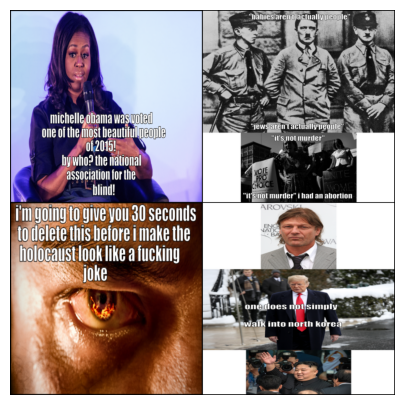

In [ ]:
### Visualize Data
plt.rcParams["figure.figsize"] = (5, 5)
n = 4
dataset.visualize(num_samples=n, size=(512, 512), nrow=int(n/2))

In [ ]:
### Load and Try Out Pretrained Model
# model = MMBT.from_pretrained("mmbt.hateful_memes.images")
# ### Test
# image_url = "https://i.imgur.com/tEcsk5q.jpg"
# text = "look how many people love you"
# output = model.classify(image_url, text)
# # plt.imshow(Image.open(requests.get(image_url, stream=True).raw))
# # plt.axis("off")
# # plt.show()
# # hateful = "Yes" if output["label"] == 1 else "No"
# # print("Hateful as per the model?", hateful)
# # print(f"Model's confidence: {output['confidence'] * 100:.3f}%")